In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('jobs.csv')
df['Date'] = pd.to_datetime(df['Month'] + ' ' + df['Year'].astype(str))
df = df.sort_values(by='Date').set_index('Date')
df[:5]

,Year,Month,jobs
Date,,,
1939-01-01,1939,Jan,912.0
1939-02-01,1939,Feb,925.0
1939-03-01,1939,Mar,929.0
1939-04-01,1939,Apr,933.0
1939-05-01,1939,May,941.0


### Plot the year-over-year (YoY) change in jobs

The YoY change for Jan-1940 is the (jobs['Jan 1940'] - jobs['Jan 1939'])*100.0 / jobs['Jan 1939']

1942-11-01 00:00:00


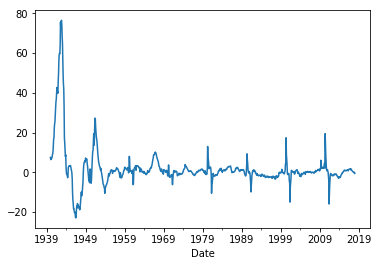

In [3]:
yoy = ((df['jobs'] - df['jobs'].shift(12))*100/df['jobs'].shift(12))
print yoy.idxmax()
yoy.plot()

### Find the months where the YoY change flipped from below 10% to above 10%.

If August-1940 had Yoy=9.2% and September-1940 had YoY=10.5%, we will say that September-1940 was the month where YoY flipped up (we call these the "flip-up" months).

Similarly find the "flip-down" months.

In [4]:
too_high = (yoy>10) | (yoy<-10)
up_months = (too_high > too_high.shift(1))
down_months = (too_high < too_high.shift(1))
print df[up_months]
print df[down_months]

            Year Month    jobs
Date                          
1940-09-01  1940   Sep  1072.0
1945-09-01  1945   Sep  2786.0
1948-01-01  1948   Jan  1889.0
1950-11-01  1950   Nov  2147.0
1953-12-01  1953   Dec  2310.0
1966-11-01  1966   Nov  2791.0
1980-04-01  1980   Apr  3258.0
1981-04-01  1981   Apr  2915.0
2000-05-01  2000   May  3244.0
2001-05-01  2001   May  2758.0
2010-05-01  2010   May  3416.0
2011-05-01  2011   May  2871.0
            Year Month    jobs
Date                          
1943-11-01  1943   Nov  3050.0
1947-12-01  1947   Dec  1948.0
1948-03-01  1948   Mar  1884.0
1952-03-01  1952   Mar  2515.0
1954-01-01  1954   Jan  2329.0
1966-12-01  1966   Dec  2799.0
1980-05-01  1980   May  3088.0
1981-05-01  1981   May  2904.0
2000-06-01  2000   Jun  3004.0
2001-06-01  2001   Jun  2780.0
2010-07-01  2010   Jul  3051.0
2011-07-01  2011   Jul  2862.0


### Find the periods (in number of days) where YoY remained above 10%.

For example, the first up-month is September-1940, and the corresponding down-month is November-1943. This corresponds to 1156 days. The second such period has 821 days, etc. Print out the number of days in each of the periods where YoY was above 10%.

* Build a DataFrame of up-months and down-months, so that the up-month and down-month for each period are aligned.
    * For example, the first row could be "1940-09-01" and "1943-11-01" (both as datetime objects)
* Now find the number of days in the difference between these two
    * If you just do a difference between datetime columns, it will give you the number of days.

In [5]:
df2 = DataFrame({'up':df[up_months].index.values, 'down':df[down_months].index.values})
df2['down'] - df2['up']

0    1156 days
1     821 days
2      60 days
3     486 days
4      31 days
5      30 days
6      30 days
7      30 days
8      31 days
9      31 days
10     61 days
11     61 days
dtype: timedelta64[ns]